# 1. import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4

# 2. import data

In [3]:
df = pd.read_csv('0 Data/raw_data.csv')
df.shape

(58693, 24)

# 3. model data

In [4]:
df['Mean_Price'] = (df['Price_1'] + df['Price_2'] + df['Price_3'] + df['Price_4'] + df['Price_5'] ) / 5
df['Mean_Promotion'] = (df['Promotion_1'] + df['Promotion_2'] + df['Promotion_3'] + df['Promotion_4'] + df['Promotion_5'] ) / 5
X = df[['Mean_Price', 'Mean_Promotion']]
Y = df['Incidence']
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean_Price,58693.0,1.998921,0.051744,1.872,1.97,2.004,2.034,2.102
Mean_Promotion,58693.0,0.171192,0.166347,0.000,0.00,0.200,0.200,0.600


In [5]:
price_range = np.arange(0.5, 3.5, 0.05)
price_range

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
       1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55,
       1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 ,
       2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65,
       2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 ,
       3.25, 3.3 , 3.35, 3.4 , 3.45])

In [6]:
df_test = pd.DataFrame(price_range)
df_test = df_test.rename(columns = {0: 'Mean_Price'})
df_test['Mean_Promotion'] = 1
df_test.shape

(60, 2)

# 4. model

In [7]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)
model_purchase.coef_

array([[-1.49382575,  0.56144157]])

In [8]:
Beta = model_purchase.coef_[0][0]
Beta

-1.4938257450214631

# 5. price elasticity

In [9]:
Y_pr = model_purchase.predict_proba(df_test)
Y_pr = Y_pr[:, 1]
Y_pr

array([0.83174697, 0.8210339 , 0.8097947 , 0.7980233 , 0.78571617,
       0.77287255, 0.75949477, 0.7455884 , 0.73116257, 0.71623009,
       0.70080758, 0.68491561, 0.66857873, 0.65182538, 0.63468789,
       0.61720225, 0.59940792, 0.58134749, 0.56306635, 0.54461226,
       0.52603482, 0.50738503, 0.48871466, 0.47007573, 0.45151989,
       0.43309789, 0.41485899, 0.3968505 , 0.37911725, 0.36170121,
       0.34464113, 0.32797226, 0.31172611, 0.29593035, 0.28060866,
       0.26578079, 0.25146257, 0.23766602, 0.2243995 , 0.2116679 ,
       0.19947287, 0.18781305, 0.17668436, 0.16608025, 0.15599199,
       0.14640893, 0.13731881, 0.12870797, 0.12056162, 0.1128641 ,
       0.10559902, 0.09874955, 0.0922985 , 0.08622857, 0.0805224 ,
       0.07516279, 0.0701327 , 0.06541542, 0.06099463, 0.05685442])

In [10]:
price_elasticity = Beta * price_range * (1 - Y_pr)
price_elasticity

array([-0.12567035, -0.14703929, -0.17048015, -0.1961167 , -0.2240719 ,
       -0.25446662, -0.28741833, -0.3230396 , -0.36143664, -0.40270766,
       -0.44694134, -0.49421523, -0.5445942 , -0.59812904, -0.65485516,
       -0.71479141, -0.7779392 , -0.84428176, -0.91378382, -0.98639141,
       -1.06203208, -1.14061543, -1.22203392, -1.30616396, -1.39286731,
       -1.4819927 , -1.57337766, -1.66685046, -1.76223222, -1.85933898,
       -1.95798391, -2.05797931, -2.15913863, -2.26127835, -2.36421967,
       -2.46779   , -2.5718243 , -2.67616618, -2.78066878, -2.88519542,
       -2.98962009, -3.09382772, -3.19771424, -3.30118659, -3.40416242,
       -3.50656986, -3.60834705, -3.70944165, -3.8098103 , -3.90941803,
       -4.00823761, -4.10624893, -4.20343837, -4.29979816, -4.39532577,
       -4.49002333, -4.58389707, -4.67695678, -4.76921534, -4.86068825])

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

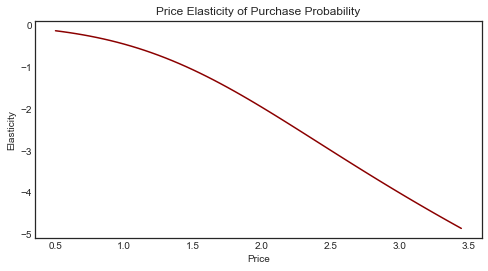

In [11]:
plt.plot(price_range,price_elasticity,color='darkred')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')